In [1]:
import torch
import numpy as np
from ANN_model import Features2_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42
CLEANED = False

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

X_new = np.concatenate((X[:, 7].reshape(-1, 1), X[:, 8].reshape(-1, 1)), axis=1) # 橫坐標, 縱坐標
train_dataset = Features12_dataset(X_new, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X_new, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 11751


In [3]:
model = Features2_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.056398, test_loss: 0.029970 | train_mape: 38.3909, test_mape: 31.0764
[Epoch 2/1000] train_loss: 0.031363, test_loss: 0.029309 | train_mape: 32.4837, test_mape: 30.9391
[Epoch 3/1000] train_loss: 0.030034, test_loss: 0.025662 | train_mape: 31.6625, test_mape: 28.2494
[Epoch 4/1000] train_loss: 0.019789, test_loss: 0.016024 | train_mape: 25.3921, test_mape: 22.4107
[Epoch 5/1000] train_loss: 0.016517, test_loss: 0.016418 | train_mape: 23.4021, test_mape: 23.2706
[Epoch 6/1000] train_loss: 0.016681, test_loss: 0.018552 | train_mape: 23.5594, test_mape: 25.4635
[Epoch 7/1000] train_loss: 0.016283, test_loss: 0.016746 | train_mape: 23.3129, test_mape: 22.2201
[Epoch 8/1000] train_loss: 0.016695, test_loss: 0.016245 | train_mape: 23.6178, test_mape: 21.6342
[Epoch 9/1000] train_loss: 0.016012, test_loss: 0.015820 | train_mape: 23.0836, test_mape: 21.8045
[Epoch 10/1000] train_loss: 0.016013, test_loss: 0.015566 | train_mape: 23.1512, test_mape: 22.8197
[Epoch 11

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features2_model1.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

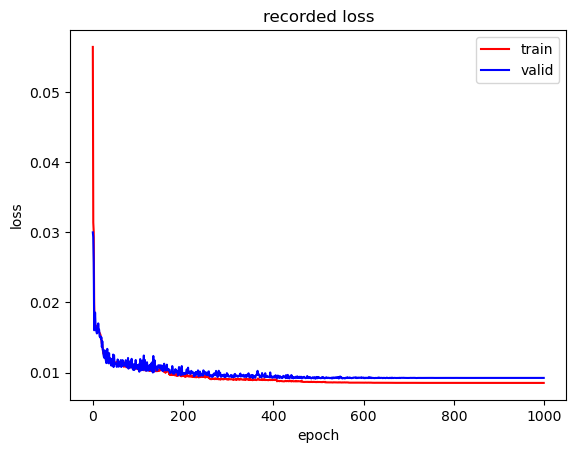

In [5]:
loss_plot(trainloss, testloss)

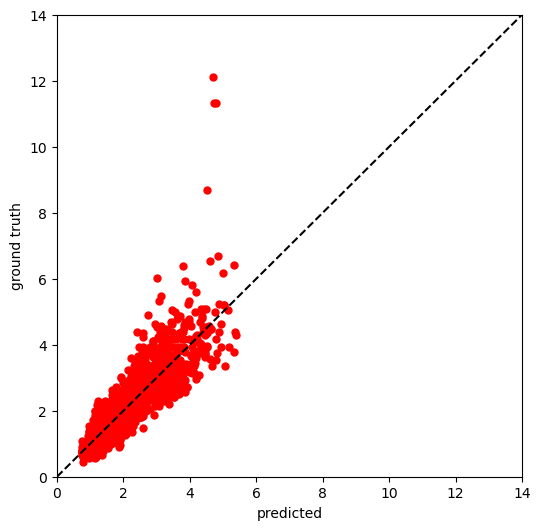

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

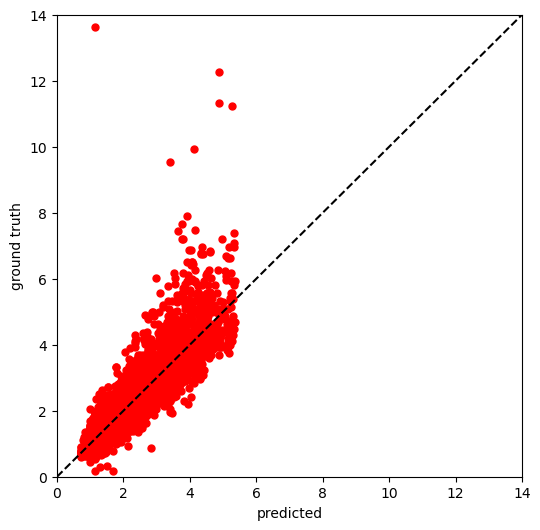

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)